# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import math
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("eventsWithReg_FULL_PT3_EB.pkl")
xtest = pd.read_pickle("xtest_FULL_PT3_tgt.pkl")
ytest = pd.read_pickle("ytest_FULL_PT3_tgt.pkl")
events_test = pd.read_pickle("events_FULL_PT3_test_tgt.pkl")

In [3]:
xtest

,clusrawE,clusIetaIx,clusIphiIy,ietamod20,iphimod20,nhits_mod
1491065,588.240234,67.0,195.0,1.0,14.0,3.0
2049240,442.792786,20.0,170.0,19.0,9.0,3.0
1391225,2513.268555,41.0,69.0,15.0,8.0,3.0
2586222,4126.320801,40.0,70.0,14.0,9.0,3.0
1957086,155.069473,28.0,203.0,2.0,2.0,3.0
...,...,...,...,...,...,...
1218101,351.371216,57.0,20.0,11.0,19.0,3.0
2032617,494.216217,-27.0,13.0,-1.0,12.0,3.0
2488797,1062.214844,-27.0,101.0,-1.0,0.0,3.0
2222097,2293.864502,29.0,57.0,3.0,16.0,3.0


# Definitions:

In [4]:
Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int = [0,1,2,3,4,5,10,50,100,200,1000]
def Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 10
    if n == 6:
        lowPt = 10
        highPt = 50
    if n == 7:
        lowPt = 50
        highPt = 100
    if n == 8:
        lowPt = 100
        highPt = 1000
    if n == 9:
        lowPt = 1000
        highPt = 10000
    
    return lowPt, highPt    

In [5]:
Ptrange_0_2_4_7_10_int = [0,2,4,7,10]
def Ptrange_0_2_4_7_10(n):
    if n == 0:
        lowPt = 0
        highPt = 2
    if n == 1:
        lowPt = 2
        highPt = 4
    if n == 2:
        lowPt = 4
        highPt = 7
    if n == 3:
        lowPt = 7
        highPt = 10
    
    return lowPt, highPt 


In [6]:
Ptrange_0_1_10_100_1000_int = [0,1,10,100,1000]
def Ptrange_0_1_10_100_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 10
    if n == 2:
        lowPt = 10
        highPt = 100
    if n == 3:
        lowPt = 100
        highPt = 1000
    
    return lowPt, highPt   

In [7]:
Ptrange_0_10_1000_int = [0,10,1000]
def Ptrange_0_10_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 1000
    
    return lowPt, highPt   

In [8]:
Ptrange_0_10_500_1000_1500_int = [0,10,500,1000,1500]
def Ptrange_0_10_500_1000_1500(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 500
    if n == 2:
        lowPt = 0
        highPt = 1000
    if n == 3:
        lowPt = 10
        highPt = 1500
    
    return lowPt, highPt   

In [9]:
Ptrange_6_10_100_300_1000_int = [6,10,100,300,1000]
def Ptrange_6_10_100_300_1000(n):
    if n == 0:
        lowPt = 6
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 100
    if n == 2:
        lowPt = 100
        highPt = 300
    if n == 3:
        lowPt = 300
        highPt = 1000
    
    return lowPt, highPt 

# Variables:

In [10]:
ytest


,tgtvar
1491065,0.002382
2049240,0.011652
1391225,0.057734
2586222,0.031994
1957086,0.039869
...,...
1218101,0.008199
2032617,0.003564
2488797,0.035022
2222097,-0.007875


In [11]:
events_test

,nClus,clusrawE,cluscorrE,clusPt,clusEta,clusRho,clusPhi,clusLayer,clusSize,clusIetaIx,...,iphimod20,nhits,tgtvar,nlgtgtvar,weight,nhits_mod,response,resolution,e91X,e91Xres
1491065,1.0,588.240234,593.979370,333.835815,1.167168,137.238235,-3.066257,-1.0,21.0,67.0,...,14.0,21.0,0.002382,1.002385,7.610431e-07,3.0,1.006354,0.007707,591.978088,4.562619
2049240,2.0,442.792786,444.980103,418.174652,0.341472,140.963791,2.780570,-1.0,22.0,20.0,...,9.0,22.0,0.011652,1.011720,7.610431e-07,3.0,1.003491,0.007617,444.338715,3.384497
1391225,1.0,2513.268555,2683.360840,462.948029,-2.376279,61.123138,2.046364,-2.0,13.0,41.0,...,8.0,13.0,0.057734,1.059433,7.610431e-07,3.0,1.058788,0.139338,2661.017578,370.782104
2586222,1.0,4126.320801,4307.991211,817.209595,2.302440,66.070068,2.077416,-2.0,20.0,40.0,...,9.0,20.0,0.031994,1.032511,3.957606e-06,3.0,1.048597,0.112897,4326.846191,488.487000
1957086,1.0,155.069473,157.404144,138.114029,0.490574,139.460648,-2.920526,-1.0,16.0,28.0,...,2.0,16.0,0.039869,1.040675,7.610431e-07,3.0,1.013639,0.006838,157.184402,1.074865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218101,2.0,351.371216,355.256866,230.828339,0.982037,138.711700,0.161571,-1.0,20.0,57.0,...,19.0,20.0,0.008199,1.008233,7.610431e-07,3.0,1.010207,0.007689,354.957733,2.729241
2032617,2.0,494.216217,497.414764,444.452271,-0.468909,140.634918,0.046174,-1.0,23.0,-27.0,...,12.0,23.0,0.003564,1.003571,7.610431e-07,3.0,1.004013,0.007611,496.199646,3.776538
2488797,1.0,1062.214844,1074.453003,951.764954,-0.477221,140.712051,1.570660,-1.0,24.0,-27.0,...,0.0,24.0,0.035022,1.035642,3.957606e-06,3.0,1.005706,0.009158,1068.276001,9.783155
2222097,1.0,2293.864502,2381.602295,468.564697,-2.270868,68.223358,2.854699,-2.0,15.0,29.0,...,16.0,15.0,-0.007875,0.992156,7.610431e-07,3.0,1.045135,0.118546,2397.397217,284.202881


In [12]:
tgtvar = []
for i in range(len(ytest)):
    tgtvar.extend(ytest.iloc[i])

# Loading models and making predicitons:

In [13]:
XGBR = pickle.load(open('XGBR_model_FULL_PT3_tgt.sav', 'rb'))
ETR = pickle.load(open('ETR_model_FULL_PT3_tgt.sav', 'rb'))

In [14]:
NSVR = pickle.load(open('NSVR_model_FULL_PT3_tgt.sav', 'rb'))
SVR = pickle.load(open('SVR_model_FULL_PT3_tgt.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model_FULL_PT3_tgt.sav', 'rb'))
ADA = pickle.load(open('ADA_model_FULL_PT3_tgt.sav', 'rb'))
KNR = pickle.load(open('KNR_model_FULL_PT3_tgt.sav', 'rb'))
RFR = pickle.load(open('RFR_model_FULL_PT3_tgt.sav', 'rb'))

In [124]:
ypred_XGBR = np.array(XGBR.predict(xtest, ntree_limit=XGBR.best_ntree_limit))
ypred_ETR = np.array(ETR.predict(xtest))

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [114]:
ypred_NSVR = np.array(NSVR.predict(xtest))
ypred_SVR = np.array(SVR.predict(xtest))
ypred_HGBR = np.array(HGBR.predict(xtest))
ypred_ADA = np.array(ADA.predict(xtest))
ypred_KNR = np.array(KNR.predict(xtest))
ypred_RFR = np.array(RFR.predict(xtest))

In [125]:
ypred_XGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_XGBR[i]) for i in range(len(ypred_XGBR))]
ypred_ETR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ETR[i]) for i in range(len(ypred_ETR))]
ypred_NSVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_NSVR[i]) for i in range(len(ypred_NSVR))]
ypred_SVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_SVR[i]) for i in range(len(ypred_SVR))]
ypred_HGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_HGBR[i]) for i in range(len(ypred_HGBR))]
ypred_ADA = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ADA[i]) for i in range(len(ypred_ADA))]
ypred_KNR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_KNR[i]) for i in range(len(ypred_KNR))]
ypred_RFR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_RFR[i]) for i in range(len(ypred_RFR))]

# Creating Dataframe:

In [140]:
genPt = np.array(events_test["genPt"])[:10000]
#genEta = np.array(eventsWithReg_EB["genEta"])[:10000]
#response = np.array(eventsWithReg_EB["response"])[:10000]
#tgtvar_og = np.array(eventsWithReg_EB["tgtvar"])[:10000]
clusrawE = np.array(events_test["clusrawE"])[:10000]
cluscorrE = np.array(events_test["cluscorrE"])[:10000]
#clusPt = np.array(eventsWithReg_EB["clusPt"])[:10000]
genEnergy = np.array(events_test["genEnergy"])[:10000]
e91X = np.array(events_test["e91X"])[:10000]
#events = np.arange(0,10000,1)


rawDivGen = np.divide(clusrawE, genEnergy)[:10000]
e91XDivGen = np.divide(e91X,  genEnergy)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  events_test['genEnergy'])[:10000]
etrDivGen = np.divide(ypred_ETR,  events_test['genEnergy'])[:10000]
nsvrDivGen = np.divide(ypred_NSVR,  events_test['genEnergy'])[:10000]
corrDivGen = np.divide(cluscorrE,  genEnergy)[:10000]
svrDivGen = np.divide(ypred_SVR,  events_test['genEnergy'])[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  events_test['genEnergy'])[:10000]
adaDivGen = np.divide(ypred_ADA,  events_test['genEnergy'])[:10000]
knrDivGen = np.divide(ypred_KNR,  events_test['genEnergy'])[:10000]
rfrDivGen = np.divide(ypred_RFR,  events_test['genEnergy'])[:10000]


In [141]:
print(len(clusrawE))
print(len(etrDivGen))
print(len(etrDivGen))
#print(len(events))
print(len(rfrDivGen))

10000
10000
10000
10000


In [142]:
df = pd.DataFrame({
    #'events':events,
    'genPt':genPt,
    #'genEta':genEta,
    #'clusPt':clusPt,
    'clusrawE':clusrawE,
    'cluscorrE':cluscorrE,
    'e91X' :e91X,
    'genEnergy':genEnergy,
    'rawDivGen':rawDivGen,
    'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    'nsvrDivGen':nsvrDivGen,
    'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen
})
df[['rawDivGen','e91XDivGen','xgbrDivGen','nsvrDivGen','svrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


,rawDivGen,e91XDivGen,xgbrDivGen,nsvrDivGen,svrDivGen,hgbrDivGen,adaDivGen,knrDivGen,rfrDivGen,etrDivGen,corrDivGen
1491065,0.997621,1.003960,1.010934,1.015828,1.193132,1.011371,1.114170,1.024482,1.025231,1.009005,1.007354
2049240,0.988415,0.991866,1.000604,1.003346,1.186330,0.999009,1.086691,1.014751,1.015771,1.052903,0.993298
1391225,0.943901,0.999390,0.998574,1.019019,1.091198,1.003130,1.068033,1.015821,0.973321,0.997341,1.007782
2586222,0.968512,1.015579,1.056591,1.037586,1.118096,1.037511,1.095881,1.027328,0.998700,1.075847,1.011153
1957086,0.960915,0.974021,0.979168,0.986171,1.164108,0.978732,1.073175,0.984354,0.987509,0.994981,0.975382
...,...,...,...,...,...,...,...,...,...,...,...
1562682,1.006993,1.010460,1.013827,1.022401,1.210386,1.017542,1.124636,1.015211,1.034863,1.017648,1.011460
2594244,1.042889,1.095096,1.084231,1.137951,1.211844,1.137377,1.180039,1.029908,1.103151,1.072898,1.079641
99534,0.951829,1.062548,1.067521,1.067395,1.162647,1.070232,1.073410,1.058255,1.075962,1.085506,1.053751
819506,0.851081,0.958626,0.956007,0.959416,1.034356,0.962942,0.963840,0.964180,0.962075,0.964697,0.994052


# create columns which bins corrE/genE for each regression

In [143]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin genPt

In [144]:
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = np.array(div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int)
df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int, labels = ['0','1','2','3','4','5','6','7','8','9'])

div_bins_0_1_10_100_1000_int = Ptrange_0_1_10_100_1000_int
div_bins_0_1_10_100_1000_int = np.array(div_bins_0_1_10_100_1000_int)
df['binned_genPt_0_1_10_100_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_10_100_1000_int, labels = ['0','1','2','3'])

div_bins_0_10_1000_int = Ptrange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_genPt_0_10_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_1000_int, labels = ['0','1'])

div_bins_0_10_500_1000_1500_int = Ptrange_0_10_500_1000_1500_int
div_bins_0_10_500_1000_1500_int = np.array(div_bins_0_10_500_1000_1500_int)
df['binned_genPt_0_10_500_1000_1500_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_500_1000_1500_int, labels = ['0','1','2','3'])

div_bins_0_2_4_7_10_int = Ptrange_0_2_4_7_10_int
div_bins_0_2_4_7_10_int = np.array(div_bins_0_2_4_7_10_int)
df['binned_genPt_0_2_4_7_10_int'] = pd.cut(df['genPt'], bins = div_bins_0_2_4_7_10_int, labels = ['0','1','2','3'])

div_bins_6_10_100_300_1000_int = Ptrange_6_10_100_300_1000_int
div_bins_6_10_100_300_1000_int = np.array(div_bins_6_10_100_300_1000_int)
df['binned_genPt_6_10_100_300_1000_int'] = pd.cut(df['genPt'], bins = div_bins_6_10_100_300_1000_int, labels = ['0','1','2','3'])

# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [145]:
dict_of_genPt_lists_1 = []
for i in range(0,10):
    dict_of_genPt_lists_1.append(df[df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] == str(i)])
    
dict_of_genPt_lists_2 = []
for i in range(0,10):
    dict_of_genPt_lists_2.append(df[df['binned_genPt_0_1_10_100_1000_int'] == str(i)])
    
dict_of_genPt_lists_3 = []
for i in range(0,10):
    dict_of_genPt_lists_3.append(df[df['binned_genPt_0_10_1000_int'] == str(i)])
    
dict_of_genPt_lists_4 = []
for i in range(0,10):
    dict_of_genPt_lists_4.append(df[df['binned_genPt_0_10_500_1000_1500_int'] == str(i)])
    
dict_of_genPt_lists_5 = []
for i in range(0,10):
    dict_of_genPt_lists_5.append(df[df['binned_genPt_0_2_4_7_10_int'] == str(i)])
    
dict_of_genPt_lists_6 = []
for i in range(0,10):
    dict_of_genPt_lists_6.append(df[df['binned_genPt_6_10_100_300_1000_int'] == str(i)])

# RMSE comparisons:

In [146]:
e91XDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
corrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,corrDivGen)).mean()),4)
etrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
xgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,xgbrDivGen)).mean()),4)
hgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,hgbrDivGen)).mean()),4)
svrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,svrDivGen)).mean()),4)
nsvrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,nsvrDivGen)).mean()),4)
knrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,knrDivGen)).mean()),4)
adaDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,adaDivGen)).mean()),4)
rfrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,rfrDivGen)).mean()),4)

RMSEs = pd.DataFrame({'name' : ['e91XDivGen_RMSE', 'corrDivGen_RMSE', 'etrDivGen_RMSE', 'xgbrDivGen_RMSE', 'hgbrDivGen_RMSE', 'svrDivGen_RMSE', 'nsvrDivGen_RMSE', 'knrDivGen_RMSE'], 
                     'RMSEs' : [e91XDivGen_RMSE, corrDivGen_RMSE, etrDivGen_RMSE, xgbrDivGen_RMSE, hgbrDivGen_RMSE, svrDivGen_RMSE, nsvrDivGen_RMSE, knrDivGen_RMSE]})

In [147]:
RMSEs = RMSEs.set_index('name')

In [148]:
RMSEs['RMSEs']

name
e91XDivGen_RMSE    0.0474
corrDivGen_RMSE    0.0430
etrDivGen_RMSE     0.0474
xgbrDivGen_RMSE    0.0434
hgbrDivGen_RMSE    0.0429
svrDivGen_RMSE     0.1571
nsvrDivGen_RMSE    0.0498
knrDivGen_RMSE     0.0580
Name: RMSEs, dtype: float64

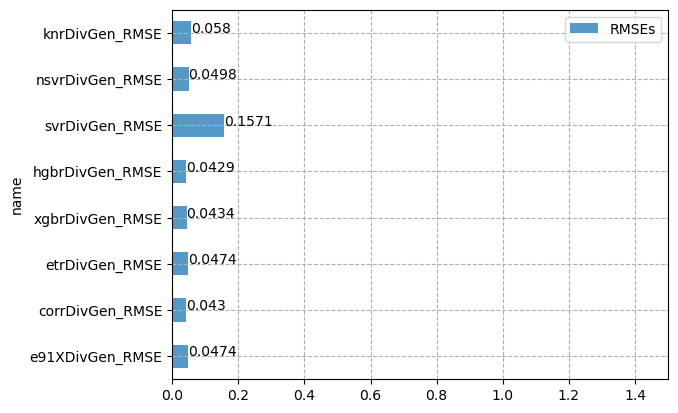

In [152]:

RMSEs.plot( kind='barh',alpha=.75)
plt.xlabel("")
plt.grid('on', ls = '--')
for index, value in enumerate(RMSEs['RMSEs']):
    plt.text(value, index,
             str(RMSEs['RMSEs'][index]))
plt.xlim([0,1.5])
plt.savefig('RMSEs_tgt.pdf')
plt.show()



# Histograms:

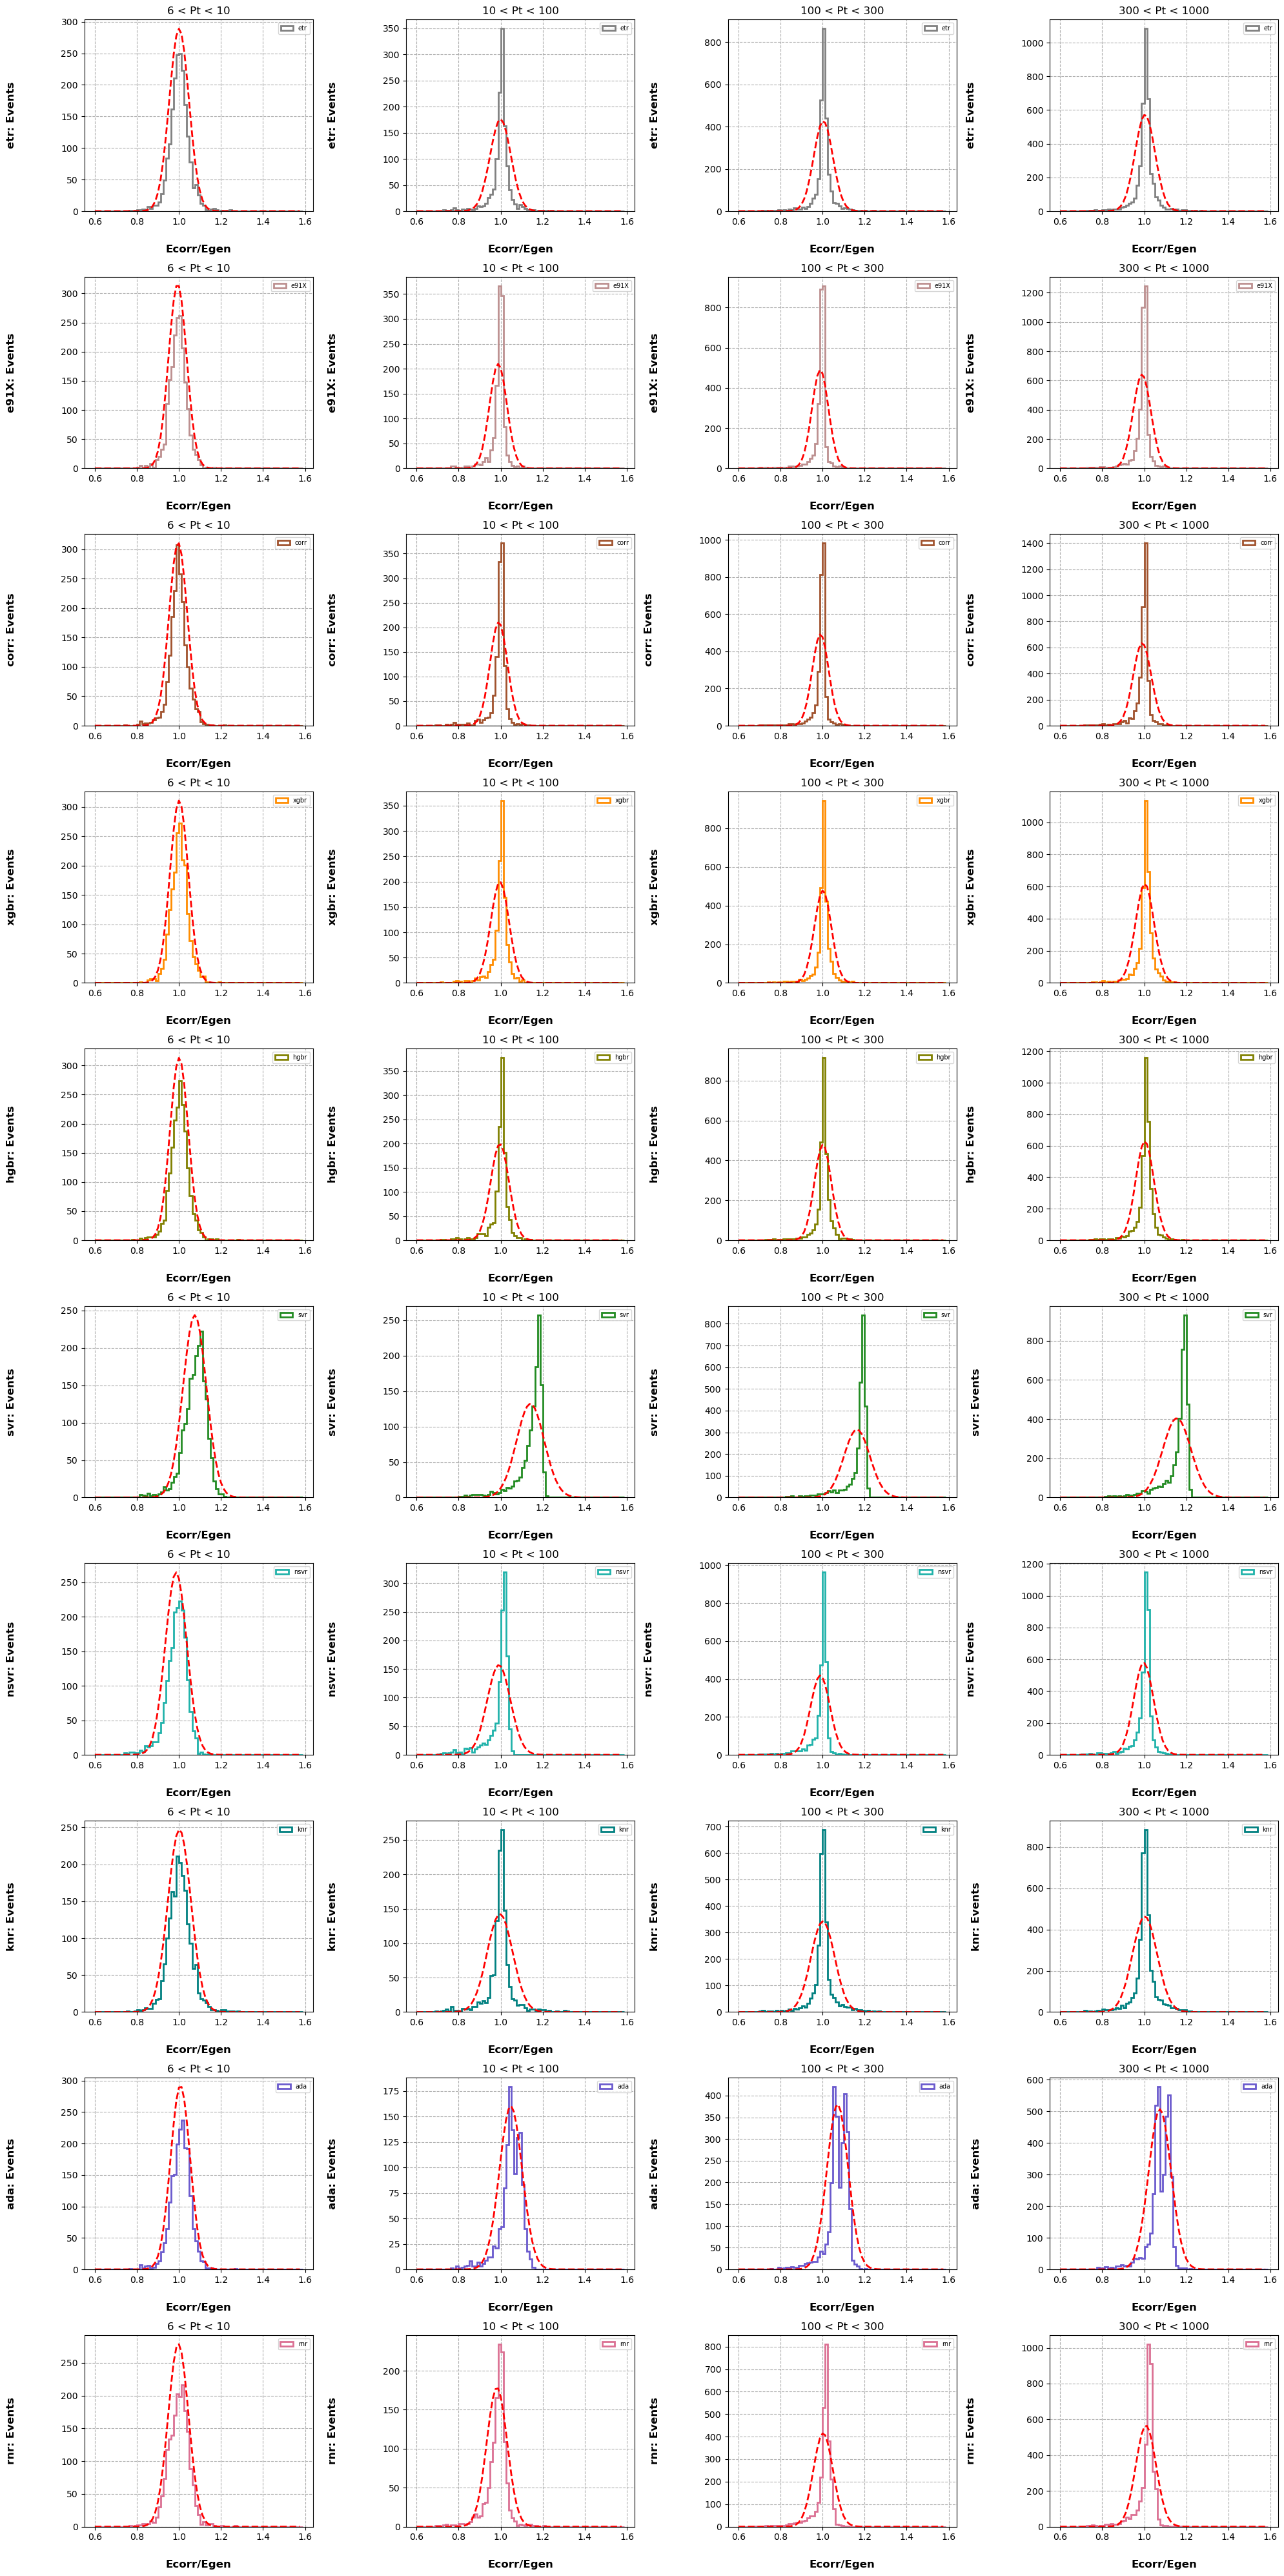

In [150]:
list_of_lists = []

fig, ax4 = plt.subplots(10,4, figsize =(20, 40),sharey=False,tight_layout=True )

for i in range(40):    
    a = i%4
    b = (i - (i%4))/4 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'e91X', 'corr', 'xgbr', 'hgbr', 'svr', 'nsvr', 'knr', 'ada', 'rnr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_6[a]['etrDivGen'],
        dict_of_genPt_lists_6[a]['e91XDivGen'], 
        dict_of_genPt_lists_6[a]['corrDivGen'],
        dict_of_genPt_lists_6[a]['xgbrDivGen'],
        dict_of_genPt_lists_6[a]['hgbrDivGen'],
        dict_of_genPt_lists_6[a]['svrDivGen'],
        dict_of_genPt_lists_6[a]['nsvrDivGen'],
        dict_of_genPt_lists_6[a]['knrDivGen'],
        dict_of_genPt_lists_6[a]['adaDivGen'],
        dict_of_genPt_lists_6[a]['rfrDivGen']
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Ptrange_6_10_100_300_1000(a)[0]) + " < Pt < " + str(Ptrange_6_10_100_300_1000(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][b])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax4[b,a].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("10x4_model_comp.pdf")

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


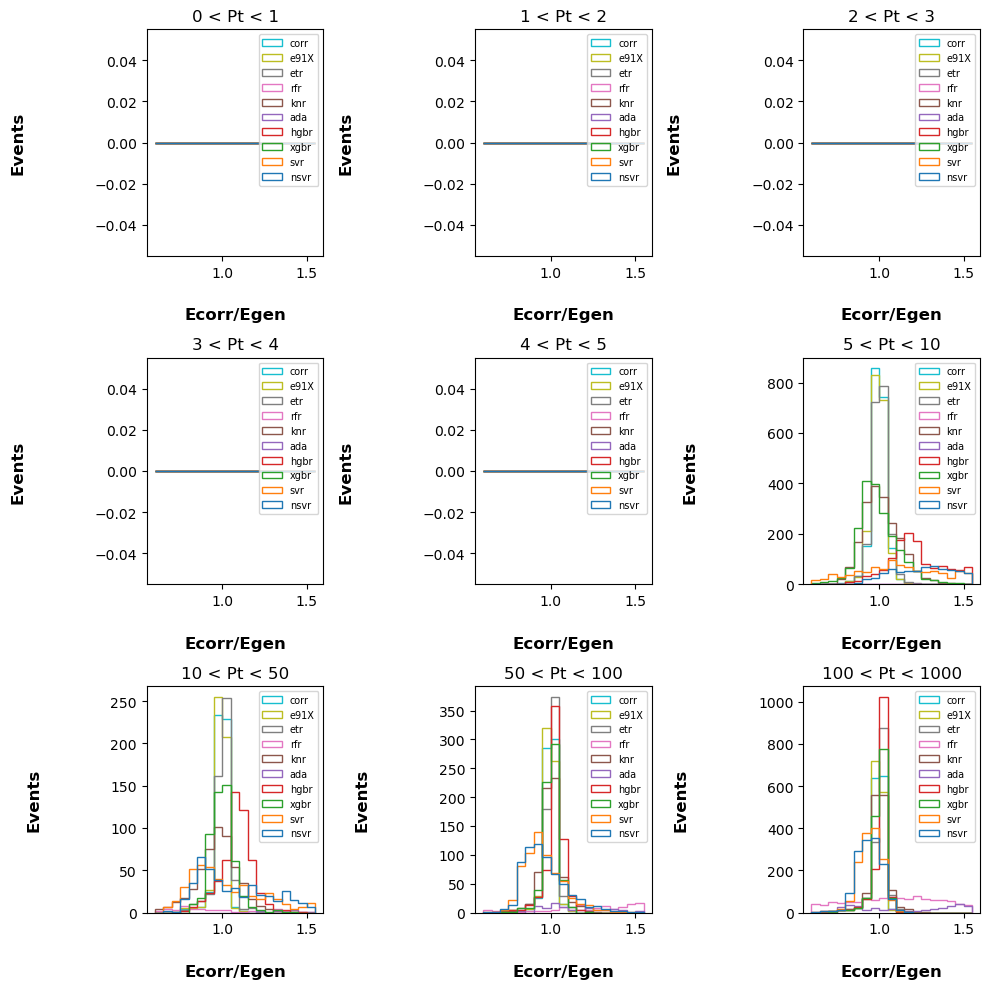

In [29]:

list_of_lists = []

fig, ax = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append(
        [dict_of_genPt_lists_1[i]['nsvrDivGen'],
        dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        dict_of_genPt_lists_1[i]['hgbrDivGen'],
        dict_of_genPt_lists_1[i]['adaDivGen'],
        dict_of_genPt_lists_1[i]['knrDivGen'],
        dict_of_genPt_lists_1[i]['rfrDivGen'],
        dict_of_genPt_lists_1[i]['etrDivGen'],
        dict_of_genPt_lists_1[i]['e91XDivGen'],
        dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    count, bins, ignored = ax[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax[b,a].legend(prop={'size':7})
    
    
    ax[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,2])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
    
plt.savefig("reg_comp_hist.pdf")

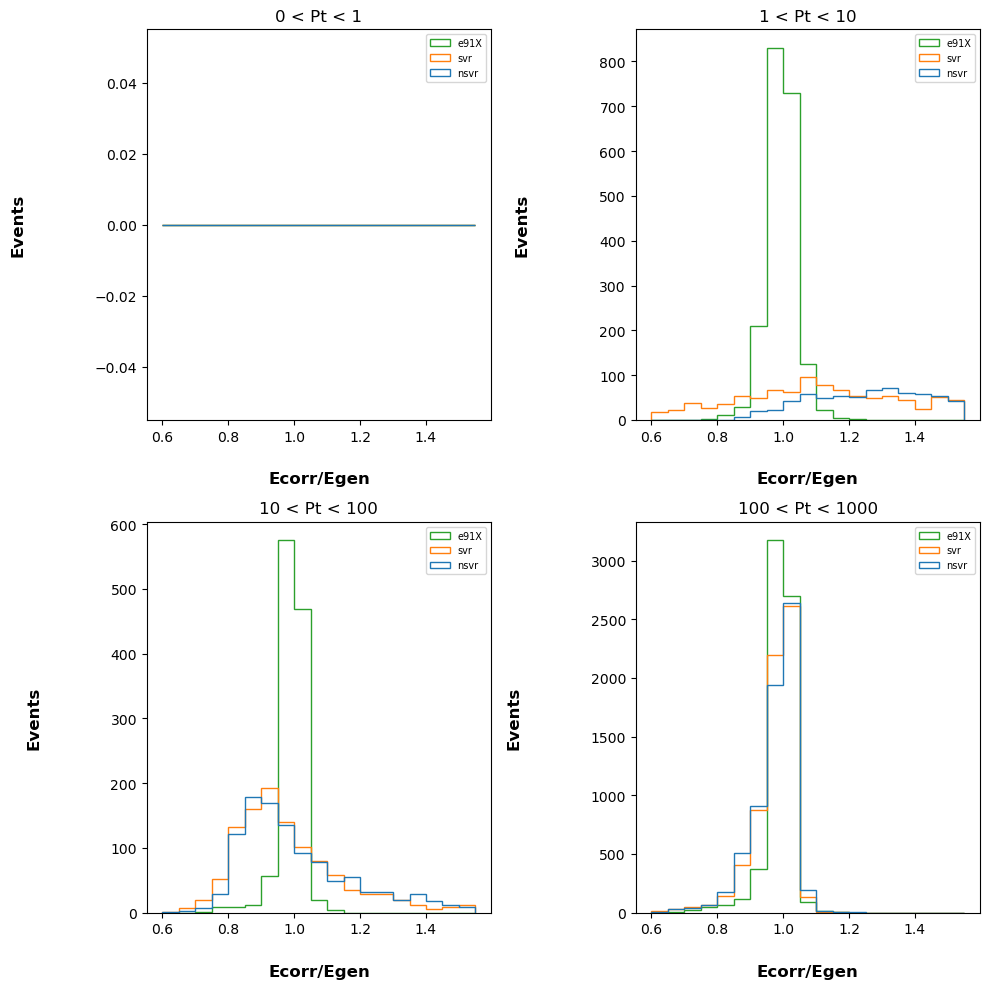

In [30]:
list_of_lists = []

fig, ax1 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        dict_of_genPt_lists_2[i]['nsvrDivGen'],
        dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        #dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        "nsvr",
        "svr", 
        #"xgbr",
        #"hgbr", 
        #"ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax1[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax1[b,a].legend(prop={'size':7})
    
    
    ax1[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax1[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax1[b,a].set_title((str(Ptrange_0_1_10_100_1000(i)[0]) + " < Pt < " + str(Ptrange_0_1_10_100_1000(i)[1])))
    
    
    
    bins = bins[:-1]
    
plt.savefig("reg_comp_hist.pdf")

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


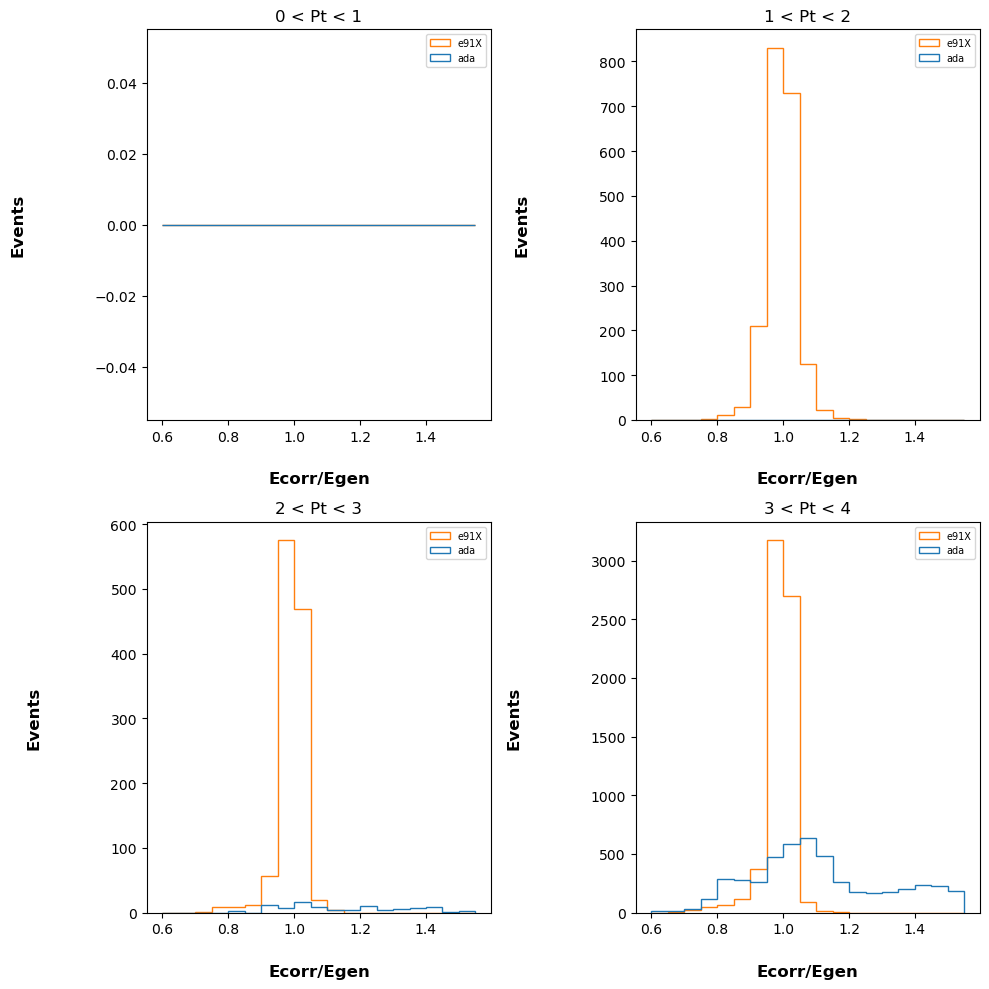

In [31]:
list_of_lists = []

fig, ax2 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_2[i]['nsvrDivGen'],
        #dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        #"nsvr",
        #"svr", 
        #"xgbr",
        #"hgbr", 
        "ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax2[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax2[b,a].legend(prop={'size':7})
    
    
    ax2[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax2[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax2[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][1])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax2[b,a].plot(bins, mean*(sigma**.4)*3* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

    
    
plt.savefig("reg_comp_hist.pdf")

# Fitting process:

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


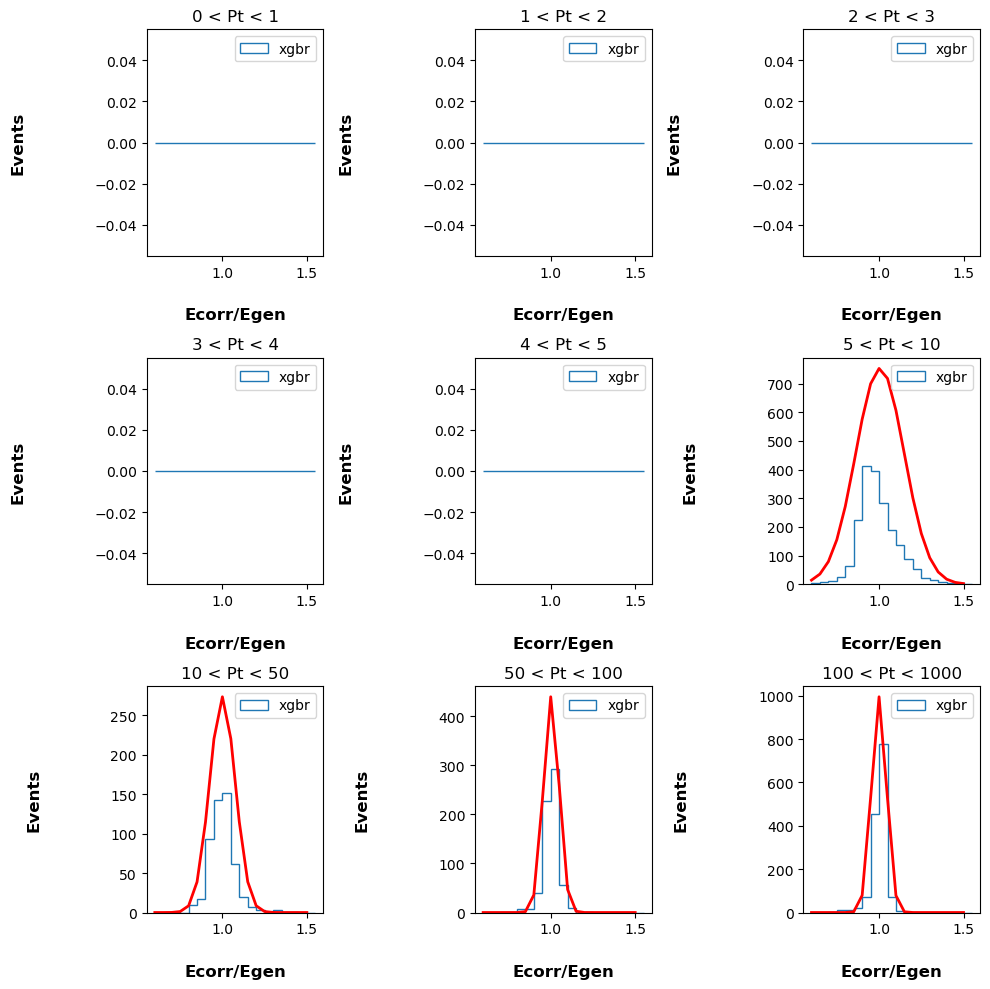

In [32]:

list_of_lists = []

fig, ax3 = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_1[i]['e91XDivGen'],
        #dict_of_genPt_lists_1[i]['nsvrDivGen'],
        #dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        #dict_of_genPt_lists_1[i]['hgbrDivGen'],
        #dict_of_genPt_lists_1[i]['adaDivGen'],
        #dict_of_genPt_lists_1[i]['knrDivGen'],
        #dict_of_genPt_lists_1[i]['rfrDivGen'],
        #dict_of_genPt_lists_1[i]['etrDivGen'],
        #dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = [#"e91X",
              #"nsvr",
              #"svr", 
              "xgbr",
              #"hgbr", 
              #"ada", 
              #"knr", 
              #"rfr", 
              #"etr", 
              #"corr"
             ]
    
    count, bins, ignored = ax3[b,a].hist(list_of_lists[i][0], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax3[b,a].legend(prop={'size':10})
    
    
    ax3[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax3[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax3[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    #df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][0])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax3[b,a].plot(bins, mean*(sigma**.5)*7* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

plt.savefig("reg_comp_hist.pdf")